<a href="https://colab.research.google.com/github/rahmashintav/TeoriAntrian/blob/main/TeoriAntrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#2.1. Pra-pemrosesan Data

from google.colab import files

# Upload file
uploaded = files.upload()

import pandas as pd
import numpy as np

# Membaca file Excel
data = pd.read_excel('HospitalEDData_Jakarta.xlsx')

# Menampilkan data (10 baris pertama)
data.head(20)

Saving HospitalEDData_Jakarta.xlsx to HospitalEDData_Jakarta (1).xlsx


,Patient_ID,Age,Sex,Income,Occupation,Transportation_Type,Reason_Not_Using_Ambulance,Transportation_Cost,Khow_How_to_Call_Ambulance,Reason_Using_Ambulance,...,Date_Decide_to_Hosp,Time_Decide_to_hosp,Date_Transport_Arrived,Time_Transport_Arrived,Date_Leave_for_Hosp,Time_Leave_for_Hosp,Date_Arrive_at_Hospital,Time_Arrive_at_Hospital,Date_Treated,Time_Treated
0,1,55.0,Female,1-3 million IDR,Employee,Public transport,Don't know,"< 100,000 IDR",No,NaN,...,2019-12-01,10:00:00,2019-12-01,10:00:00,2019-12-01,10:00:00,2019-12-01,11:00:00,2019-12-01,11:05:00
1,2,69.0,Male,1-3 million IDR,Other,Ride-sharing service car,Don't know,"< 100,000 IDR",No,NaN,...,2019-12-03,08:00:00,2019-12-03,09:30:00,2019-12-03,09:30:00,2019-12-03,10:45:00,2019-12-03,10:50:00
2,3,44.0,Male,"3,1 - 5 million IDR",Enterpreneur,Ambulance,NaN,"500,000 - 1,000,000 IDR",Yes,Medical condition,...,2019-12-03,07:00:00,2019-12-03,08:20:00,2019-12-03,08:20:00,2019-12-03,09:45:00,2019-12-03,09:45:00
3,4,62.0,Male,1-3 million IDR,Employee,Ambulance,NaN,"500,000 - 1,000,000 IDR",No,Medical condition,...,2019-12-03,11:00:00,2019-12-03,12:30:00,2019-12-03,12:30:00,2019-12-03,14:40:00,2019-12-03,14:40:00
4,5,49.0,Male,"3,1 - 5 million IDR",Other,Ride-sharing service car,Don't know,"< 100,000 IDR",Yes,NaN,...,2019-12-04,19:00:00,2019-12-04,20:00:00,2019-12-04,20:00:00,2019-12-04,23:50:00,2019-12-04,23:55:00
5,6,51.0,Female,Unknown,Other,Ride-sharing service car,Too expensive,"< 100,000 IDR",No,NaN,...,2019-12-04,21:00:00,2019-12-04,21:00:00,2019-12-04,21:00:00,2019-12-04,22:30:00,2019-12-04,22:30:00
6,7,69.0,Female,1-3 million IDR,Other,Ambulance,NaN,"500,000 - 1,000,000 IDR",Yes,Medical condition,...,2019-12-04,19:00:00,2019-12-04,20:00:00,2019-12-04,20:00:00,2019-12-04,21:00:00,2019-12-04,21:00:00
7,8,54.0,Female,Unknown,Other,Ambulance,NaN,"500,000 - 1,000,000 IDR",No,Medical condition,...,2019-12-04,10:00:00,2019-12-04,10:00:00,2019-12-04,10:00:00,2019-12-04,11:15:00,2019-12-04,11:20:00
8,9,65.0,Male,"3,1 - 5 million IDR",Enterpreneur,Ride-sharing service car,Don't know,"< 100,000 IDR",No,NaN,...,2019-12-04,18:00:00,2019-12-04,18:20:00,2019-12-04,18:20:00,2019-12-04,19:02:00,2019-12-04,19:05:00
9,10,64.0,Female,1-3 million IDR,Other,Motorcycle,Not necessary,"< 100,000 IDR",No,NaN,...,2019-12-05,19:00:00,2019-12-05,20:00:00,2019-12-05,20:00:00,2019-12-05,21:00:00,2019-12-05,21:00:00


In [2]:
# 2.1.1 Pembersihan Data

# Gabungkan tanggal dan waktu menjadi satu kolom datetime
data['waktu_kejadian'] = pd.to_datetime(data['Date_Emerg_Happened'].astype(str) + ' ' + data['Time_Emerg_Happened'].astype(str), errors='coerce')
data['waktu_panggilan'] = pd.to_datetime(data['Date_Decide_to_Hosp'].astype(str) + ' ' + data['Time_Decide_to_hosp'].astype(str), errors='coerce')
data['waktu_ambulans_tiba'] = pd.to_datetime(data['Date_Transport_Arrived'].astype(str) + ' ' + data['Time_Transport_Arrived'].astype(str), errors='coerce')
data['waktu_berangkat_ke_rs'] = pd.to_datetime(data['Date_Leave_for_Hosp'].astype(str) + ' ' + data['Time_Leave_for_Hosp'].astype(str), errors='coerce')
data['waktu_tiba_di_rs'] = pd.to_datetime(data['Date_Arrive_at_Hospital'].astype(str) + ' ' + data['Time_Arrive_at_Hospital'].astype(str), errors='coerce')
data['waktu_mulai_pelayanan'] = pd.to_datetime(data['Date_Treated'].astype(str) + ' ' + data['Time_Treated'].astype(str), errors='coerce')

# Buang data waktu yang tidak lengkap atau inkonsisten
data_bersih = data.dropna(subset=['waktu_tiba_di_rs', 'waktu_mulai_pelayanan']).copy()

/tmp/ipython-input-2-1736771552.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['waktu_kejadian'] = pd.to_datetime(data['Date_Emerg_Happened'].astype(str) + ' ' + data['Time_Emerg_Happened'].astype(str), errors='coerce')
/tmp/ipython-input-2-1736771552.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['waktu_panggilan'] = pd.to_datetime(data['Date_Decide_to_Hosp'].astype(str) + ' ' + data['Time_Decide_to_hosp'].astype(str), errors='coerce')
/tmp/ipython-input-2-1736771552.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['waktu_ambulans_tiba'] = pd.to

In [3]:
# 2.1.2 Pembuatan Varibel Baru

# Hitung waktu tunggu pasien (menit)
data_bersih.loc[:, 'waktu_tunggu'] = (data_bersih['waktu_mulai_pelayanan'] - data_bersih['waktu_tiba_di_rs']).dt.total_seconds() / 60

# Hitung waktu tanggap ambulans (menit)
data_bersih.loc[:, 'waktu_tanggap'] = (data_bersih['waktu_ambulans_tiba'] - data_bersih['waktu_kejadian']).dt.total_seconds() / 60

# Hitung durasi transportasi ke rumah sakit (menit)
data_bersih.loc[:, 'durasi_transportasi'] = (data_bersih['waktu_tiba_di_rs'] - data_bersih['waktu_berangkat_ke_rs']).dt.total_seconds() / 60

# Tambahkan jam kedatangan (0–23)
data_bersih.loc[:, 'jam_kedatangan'] = data_bersih['waktu_tiba_di_rs'].dt.hour

# Tambahkan nama hari (Senin, Selasa, ...)
data_bersih.loc[:, 'hari_kedatangan'] = data_bersih['waktu_tiba_di_rs'].dt.day_name()

# Tandai apakah akhir pekan
data_bersih.loc[:, 'apakah_akhir_pekan'] = data_bersih['hari_kedatangan'].isin(['Saturday', 'Sunday'])

display(data_bersih[['waktu_tunggu',
      'waktu_tanggap', 'durasi_transportasi', 'jam_kedatangan', 'hari_kedatangan', 'apakah_akhir_pekan']].head(20))

,waktu_tunggu,waktu_tanggap,durasi_transportasi,jam_kedatangan,hari_kedatangan,apakah_akhir_pekan
0,5.0,15.0,60.0,11,Sunday,True
1,5.0,120.0,75.0,10,Tuesday,False
2,0.0,110.0,85.0,9,Tuesday,False
3,0.0,150.0,130.0,14,Tuesday,False
4,5.0,960.0,230.0,23,Wednesday,False
5,0.0,120.0,90.0,22,Wednesday,False
6,0.0,180.0,60.0,21,Wednesday,False
7,5.0,15.0,75.0,11,Wednesday,False
8,3.0,80.0,42.0,19,Wednesday,False
9,0.0,60.0,60.0,21,Thursday,False


In [4]:
# 2.1.3 Deteksi Outlier dalam Data

# Buang entri dengan waktu tunggu negatif
data_bersih = data_bersih[data_bersih['waktu_tunggu'] >= 0]

# Buang entri dengan waktu tunggu > 180 menit (outlier ekstrem)
data_bersih = data_bersih[data_bersih['waktu_tunggu'] <= 180]

print("Jumlah Data Setelah Cleaning:", len(data_bersih))

Jumlah Data Setelah Cleaning: 1956


In [5]:
#2.2. Feature Engineering

# Kategorisasi waktu berdasarkan jam kedatangan
def klasifikasi_waktu(jam):
    if 5 <= jam < 11:
        return 'Pagi'
    elif 11 <= jam < 15:
        return 'Siang'
    elif 15 <= jam < 19:
        return 'Sore'
    else:
        return 'Malam'
data_bersih['kategori_waktu'] = data_bersih['jam_kedatangan'].apply(klasifikasi_waktu)

# Kategorisasi shift kerja rumah sakit
def kategori_shift(jam):
    if 7 <= jam < 15:
        return 'Shift 1'
    elif 15 <= jam < 23:
        return 'Shift 2'
    else:
        return 'Shift 3'
data_bersih['jenis_shift'] = data_bersih['jam_kedatangan'].apply(kategori_shift)

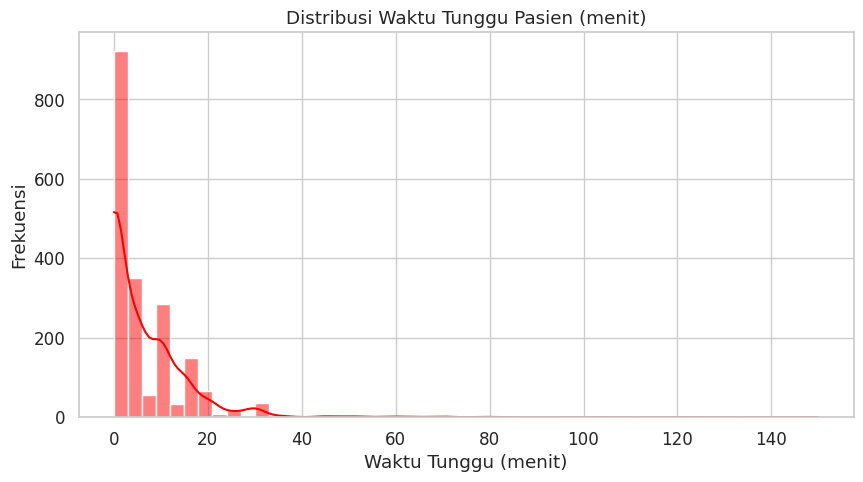

In [6]:
#2.3. Eksplorasi Data

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Visualisasi distribusi waktu tunggu
plt.figure(figsize=(10, 5))
sns.histplot(data_bersih['waktu_tunggu'], bins=50, kde=True, color='red')
plt.title('Distribusi Waktu Tunggu Pasien (menit)')
plt.xlabel('Waktu Tunggu (menit)')
plt.ylabel('Frekuensi')
plt.show()

/tmp/ipython-input-7-2702822438.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='jenis_shift', y='waktu_tunggu', data=data_bersih, palette='Set3',


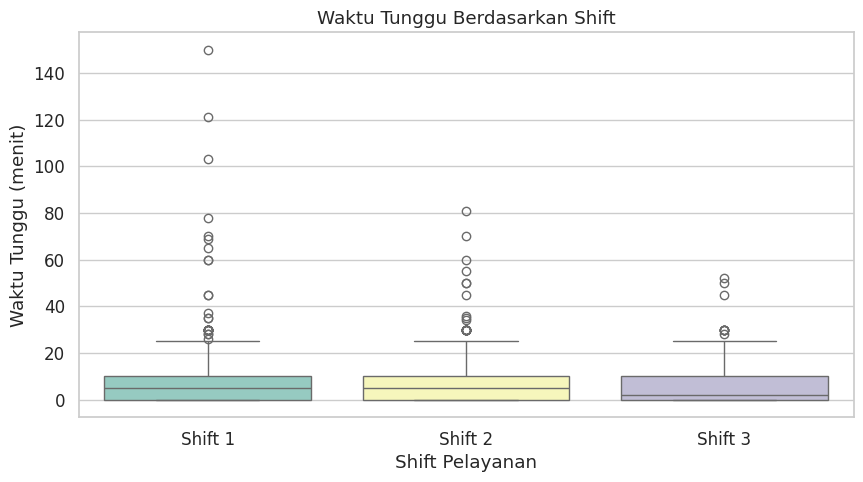

In [7]:
# Boxplot waktu tunggu berdasarkan shift
plt.figure(figsize=(10, 5))
sns.boxplot(x='jenis_shift', y='waktu_tunggu', data=data_bersih, palette='Set3',
            order=['Shift 1', 'Shift 2', 'Shift 3'])
plt.title('Waktu Tunggu Berdasarkan Shift')
plt.xlabel('Shift Pelayanan')
plt.ylabel('Waktu Tunggu (menit)')
plt.show()

/tmp/ipython-input-8-336037385.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='jenis_shift', data=data_bersih, order=['Shift 1', 'Shift 2', 'Shift 3'], palette='pastel')


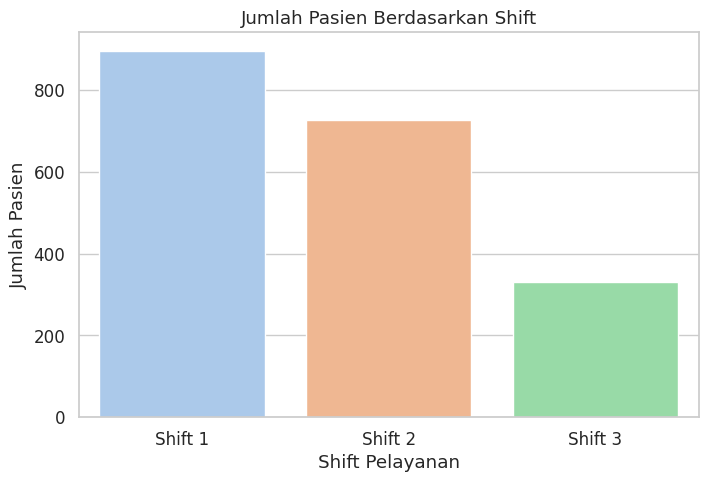

In [8]:
# Boxplot jumlah pasien berdasarkan shift
plt.figure(figsize=(8, 5))
sns.countplot(x='jenis_shift', data=data_bersih, order=['Shift 1', 'Shift 2', 'Shift 3'], palette='pastel')
plt.title('Jumlah Pasien Berdasarkan Shift')
plt.xlabel('Shift Pelayanan')
plt.ylabel('Jumlah Pasien')
plt.show()

In [9]:
#2.4.	Pemodelan dengan Machine Learning

# Regresi Kontinu
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fitur numerik
fitur_numerik = ['waktu_tanggap', 'durasi_transportasi', 'jam_kedatangan']

# Fitur kategorik yang perlu di-one-hot encoding
fitur_kategorik = ['apakah_akhir_pekan', 'kategori_waktu', 'jenis_shift']

# One-hot encoding untuk fitur kategorik
fitur_dummies = pd.get_dummies(data_bersih[fitur_kategorik], drop_first=True)

X = pd.concat([data_bersih[fitur_numerik], fitur_dummies], axis=1)
y = data_bersih['waktu_tunggu']

df_model = pd.concat([X, y], axis=1)
df_model = df_model.dropna()
X = df_model.drop(columns='waktu_tunggu')
y = df_model['waktu_tunggu']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Definisikan model
models = {
    'Regresi Linear': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Simpan hasil evaluasi
results = {}

# Latih dan evaluasi tiap model
for nama, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[nama] = {'MAE': mae, 'RMSE': rmse, 'R2 Score': r2}

# Konversi ke DataFrame untuk tampilan rapi
hasil_evaluasi = pd.DataFrame(results).T
hasil_evaluasi = hasil_evaluasi[['MAE', 'RMSE', 'R2 Score']]  # urutkan kolom
hasil_evaluasi = hasil_evaluasi.round(3)  # pembulatan 3 digit

# Tampilkan
print("Hasil Evaluasi Model Regresi Kontinu:")
print(hasil_evaluasi)

Hasil Evaluasi Model Regresi Kontinu:
                     MAE    RMSE  R2 Score
Regresi Linear     6.245   9.482     0.017
Decision Tree      8.018  12.889    -0.817
Random Forest      6.603  10.181    -0.134
Gradient Boosting  6.147   9.481     0.017


In [10]:
# Klasifikasi Kategorikal
!pip install -q catboost imbalanced-learn xgboost

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Salin data asli
data = data_bersih.copy()

# Membuat target kategori ('kelas_tunggu')
def kategori_waktu_tunggu(menit):
    if menit <= 15:
        return 'Cepat'
    elif menit <= 30:
        return 'Sedang'
    else:
        return 'Lambat'

data['kelas_tunggu'] = data['waktu_tunggu'].apply(kategori_waktu_tunggu)

# Pilih fitur relevan dan drop NaN
fitur_numerik = ['waktu_tanggap', 'durasi_transportasi', 'jam_kedatangan']
fitur_kategorikal = ['apakah_akhir_pekan', 'kategori_waktu', 'jenis_shift', 'Hospital_ID']
fitur = fitur_numerik + fitur_kategorikal

data_model = data[fitur + ['kelas_tunggu']].dropna()

# One-hot encoding fitur kategorikal kecuali boolean
data_encoded = pd.get_dummies(data_model,
    columns=['kategori_waktu', 'jenis_shift', 'Hospital_ID'],
    drop_first=True)

# X dan y
X = data_encoded.drop('kelas_tunggu', axis=1)
y = data_encoded['kelas_tunggu']

# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# SMOTENC balancing
cat_cols = [X.columns.get_loc(col) for col in X.columns if col.startswith(('apakah_akhir_pekan', 'kategori_waktu_', 'jenis_shift_', 'Hospital_ID_'))]
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

smotenc = SMOTENC(categorical_features=cat_cols, random_state=42)
X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)

# Balanced Random Forest Classifier
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_resampled, y_resampled)
y_pred_brf = brf.predict(X_test)
report_brf = classification_report(y_test, y_pred_brf, target_names=le.classes_, output_dict=True)

# CatBoost Classifier
catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_resampled, y_resampled)
y_pred_cb = catboost.predict(X_test)
report_cb = classification_report(y_test, y_pred_cb, target_names=le.classes_, output_dict=True)

# XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test)
report_xgb = classification_report(y_test, y_pred_cb, target_names=le.classes_, output_dict=True)

# Gabungkan hasil ke dataframe
def flatten_report(report, model_name):
    df = pd.DataFrame(report).T.reset_index()
    df.columns = ['class', 'precision', 'recall', 'f1-score', 'support']
    df['model'] = model_name
    return df

df_brf = flatten_report(report_brf, 'Balanced Random Forest')
df_cb = flatten_report(report_cb, 'CatBoost')
df_xgb_bin = flatten_report(report_xgb, 'XGBoost')

df_all = pd.concat([df_brf, df_cb, df_xgb_bin], ignore_index=True)
df_all[['precision', 'recall', 'f1-score']] = df_all[['precision', 'recall', 'f1-score']].round(3)
display(df_all)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:45:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,class,precision,recall,f1-score,support,model
0,Cepat,0.932,0.887,0.909,353.000000,Balanced Random Forest
1,Lambat,0.200,0.200,0.200,5.000000,Balanced Random Forest
2,Sedang,0.196,0.310,0.240,29.000000,Balanced Random Forest
3,accuracy,0.835,0.835,0.835,0.834625,Balanced Random Forest
4,macro avg,0.442,0.466,0.450,387.000000,Balanced Random Forest
5,weighted avg,0.867,0.835,0.849,387.000000,Balanced Random Forest
6,Cepat,0.938,0.895,0.916,353.000000,CatBoost
7,Lambat,0.167,0.200,0.182,5.000000,CatBoost
8,Sedang,0.227,0.345,0.274,29.000000,CatBoost
9,accuracy,0.845,0.845,0.845,0.844961,CatBoost


In [11]:
# Gabungan ketiga model

from sklearn.ensemble import VotingClassifier

# Label encoding ulang
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('brf', brf), ('catboost', catboost), ('xgb', xgb)],
    voting='soft',
    n_jobs=-1
)

# Fit model dan prediksi
voting_clf.fit(X_train, y_train_enc)
y_pred_vote = voting_clf.predict(X_test)

# Evaluasi
print("Voting Classifier Report:")
print(classification_report(y_test_enc, y_pred_vote, target_names=['Cepat', 'Lambat', 'Sedang']))

Voting Classifier Report:
              precision    recall  f1-score   support

       Cepat       0.93      0.97      0.95       353
      Lambat       0.33      0.20      0.25         5
      Sedang       0.38      0.21      0.27        29

    accuracy                           0.90       387
   macro avg       0.55      0.46      0.49       387
weighted avg       0.88      0.90      0.89       387



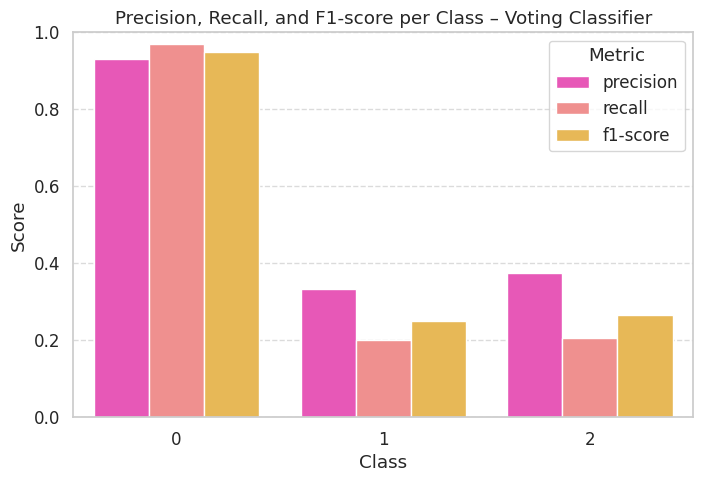

In [12]:
report_vote = classification_report(y_test, y_pred_vote, target_names=le.classes_, output_dict=True)

# Filter hanya kelas utama
df_metrics = pd.DataFrame(report_vote).T
df_metrics = df_metrics.loc[le.classes_][['precision', 'recall', 'f1-score']]
df_metrics = df_metrics.reset_index().rename(columns={'index': 'Class'})
df_metrics = df_metrics.melt(id_vars='Class', var_name='Metric', value_name='Score')

# Plot precision, recall, dan f1 pada tiap kelas
plt.figure(figsize=(8, 5))
sns.barplot(data=df_metrics, x='Class', y='Score', hue='Metric', palette='spring')
plt.ylim(0, 1)
plt.title("Precision, Recall, and F1-score per Class – Voting Classifier")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Metric')
plt.show()

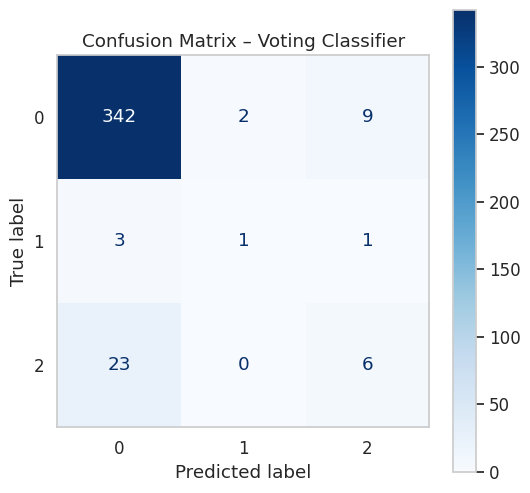

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_vote)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d')
plt.title("Confusion Matrix – Voting Classifier")
plt.grid(False)
plt.show()